<a href="https://colab.research.google.com/github/ed-chin-git/DS-Sprint-01-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [10]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things .....
!ls

sample_data


## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

*** No CODEPAGE record, no encoding_override: will use 'ascii'


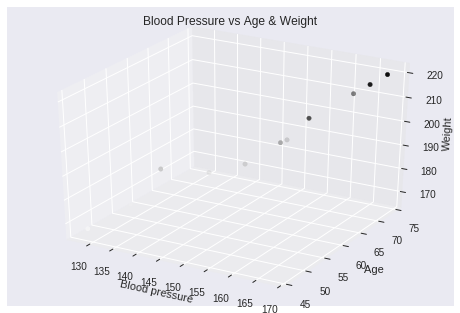

In [11]:
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
s_data['Ones'] = np.ones(len(s_data))  # add the column of ones
X = s_data[['Ones', 'X2', 'X3' ]].as_matrix() 
Y = s_data['X1'].as_matrix().reshape(-1, 1)
X_trans = np.transpose(X)
X_trans_X = np.matmul(X_trans, X)
inverse = np.linalg.inv(X_trans_X)
X_trans_Y = np.matmul(X_trans, Y)
beta = np.matmul(inverse,X_trans_Y)
beta_0 = beta[0,0]
beta_1 = beta[1,0]
beta_2 = beta[2,0]

fig = plt.figure()

#  plot data in 3D space  
fig=plt.figure()
axes=plt.axes(projection='3d')
x_axis=s_data['X1']
y_axis=s_data['X2']
z_axis=s_data['X3']
axes.scatter3D(x_axis, y_axis, z_axis, c=z_axis)


# plot BF line
axes = plt.gca()
Xvals = np.array(axes.get_xlim())
Yvals = beta_0 + beta_1 * Xvals
zvals = beta_0 + beta_2 * Xvals

plt.title('Blood Pressure vs Age & Weight')
axes.set_xlabel('Blood pressure')
axes.set_ylabel(' Age')
axes.set_zlabel('Weight');



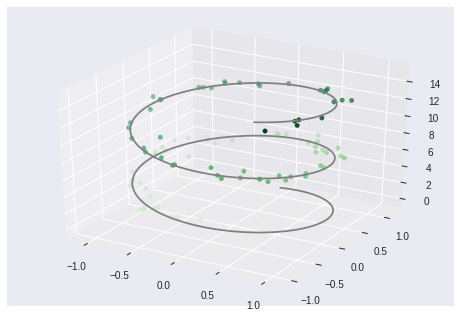

In [12]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

      Today I studied how to generate 3d graphs out of statistical data



2.  What was the most challenging part of what you did?
  
      Learning the options and variious inputs to the plotting functions
 

      

3.  What was the most interesting thing you learned?
          
       It was all incredibly interesting



4.  What area would you like to explore with more time?








## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about